In [13]:
# coding: utf-8
import sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
from numpy import eye
from LoadMZML import LoadMZML
from OptimalMz import OptimalMz
from PlotImage import PlotImage
from TemplateOverlay import TemplateOverlay
% matplotlib inline

# Parameters

In [14]:
class Parameters:
    def __init__(self):
        #  self.filename = '/Users/simon/Dropbox/MS_Ink_Data/ALphabet/abcdefgh_1.mzML'
        self.filename = '..\\data\\AA_Array_2.mzML'
        self.lines = 6
        self.widthInMM = 50
        self.heightInMM = 15
        self.downMotionInMM = 3
        
template_path = '..\\data\\aminoacid.png'
#template_path = '..\\data\\aminoacid_Cell1.png'
generated_b = 4
generated_e = 148
template_b = 4
template_e = 148
plotValues = (104.75, 105.0)

Used to find parameters

In [15]:
#PlotImage(loadMZML, param).save("aminoacid_gen",plotValues)

In [16]:
param = Parameters()
loadMZML = LoadMZML(param,'positive')
plotImage = PlotImage(loadMZML, param)
templateOverlay = TemplateOverlay(loadMZML, param)

Template Image

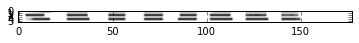

In [17]:
template = Image.open(template_path)
plt.figure()
plt.imshow(np.asarray(template), cmap='Greys_r')

Black and White

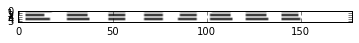

In [18]:
template = templateOverlay.RGBtoBW(template_path)
plt.figure()
plt.imshow(np.asarray(template), cmap='Greys_r')

# Overlay template and generated

100%
5.14s


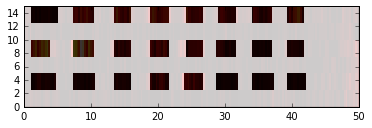

In [19]:
template = templateOverlay.alignTemplate(generated_b, generated_e, template_b, template_e, template)
generated = templateOverlay.alignGenerated(generated_b, generated_e, template_b, template_e, plotValues)
template, generated = templateOverlay.alignment(template, generated)

plt.figure()
plt.imshow(np.asarray(generated), extent=[0, param.widthInMM, 0, param.heightInMM], interpolation='none', cmap='hot')
plt.imshow(np.asarray(template), extent=[0, param.widthInMM, 0, param.heightInMM], interpolation='none', cmap='hot',
           alpha=0.8)  # 0 fully transparent

100%
44.79s
i1 - i:
[-1078.7952092   -398.8474051   -389.16685     -254.4450522   -219.86618906]

mz:
[(166.0, 166.125), (116.0, 116.125), (120.0, 120.125), (156.0, 156.125), (104.875, 105.0)]

i:
[ 1474.87827656   547.76065487   542.6538873    332.87585946   294.8997076 ]
i1:
[ 396.08306736  148.91324976  153.48703729   78.43080726   75.03351853]
c:
[ 517 1457 4907  461 3184]
c1:
[  731  4030 14308   813  6349]
range:
0.125
100%
5.89s
100%
5.02s
100%
5.29s
100%
5.00s
100%
5.03s


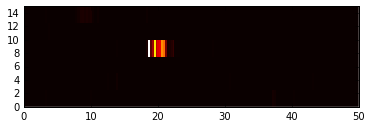

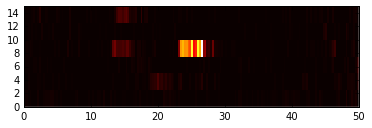

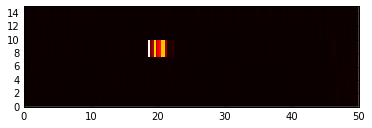

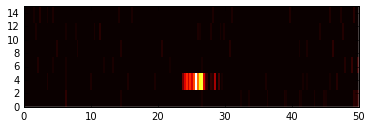

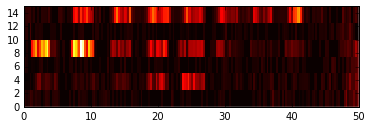

In [20]:
# Calculate optimal mass based on template
optimalMz = OptimalMz.V2(loadMZML, mzRangeLower=50, mzRangeHighest=200, resolution=1200,
                         templateClass=templateOverlay)
optimalMz.printN()
for i, j in optimalMz.getN(5):
    plotImage.plotImshowII((i, j))